<a href="https://colab.research.google.com/github/johnjustine5646/Lab9/blob/main/Lab9_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import\
accuracy_score, precision_score, recall_score, f1_score,\
roc_curve, PrecisionRecallDisplay, classification_report
from sklearn.svm import SVC as svc
import seaborn as sb

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import os
import cv2

path = '/content/drive/MyDrive/Training'
classes = {'no_tumor':0, 'pituitary_tumor':1}
X = []
Y = []

for cls in classes:
  pth = os.path.join(path, cls)
  for j in os.listdir(pth):
    img = cv2.imread(os.path.join(pth, j), 0)
    img = cv2.resize(img, (200, 200))
    X.append(img)
    Y.append(classes[cls])


In [47]:
X = np.array(X)
Y = np.array(Y)

<Axes: >

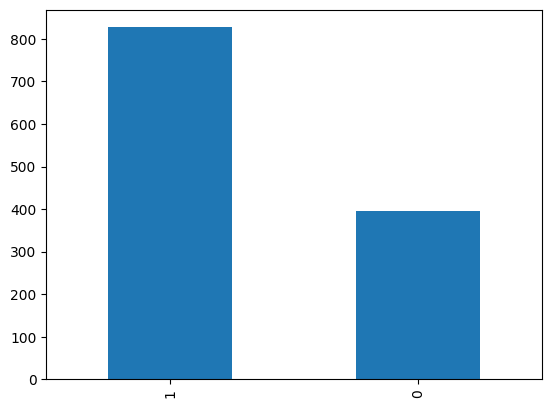

In [48]:
#checking for class imbalance
pd.Series(Y).value_counts().plot(kind='bar') #there is class imbalance

In [49]:
X_updated = X.reshape(len(X), -1)

In [50]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

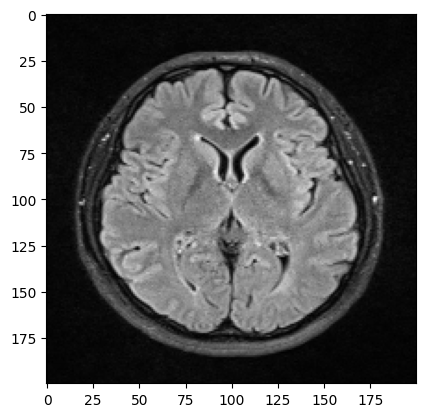

In [51]:
plt.imshow(X[0], cmap='gray')

In [54]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X_updated, Y, random_state=10,
                                                    test_size=.20)

In [56]:
sv = svc()
sv.fit(X_train, Y_train)


SVC()

In [58]:
print("Training Score:", sv.score(X_train, Y_train))
print("Testing Score:", sv.score(X_test, Y_test))

Training Score: 0.9928352098259979
Testing Score: 0.9673469387755103


In [70]:
ages = []
for i in range(1222):
  ages.append(np.random.randint(30,90))

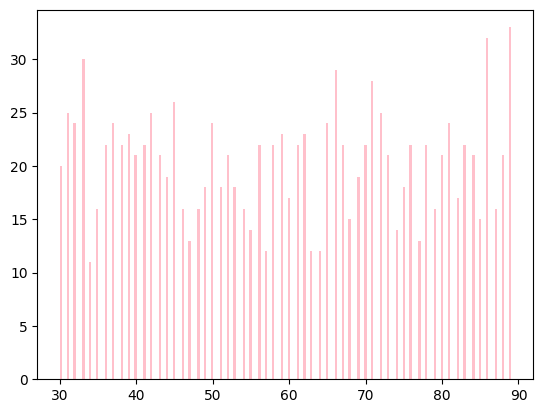

In [71]:

pt.hist(ages, bins=200, color='pink');

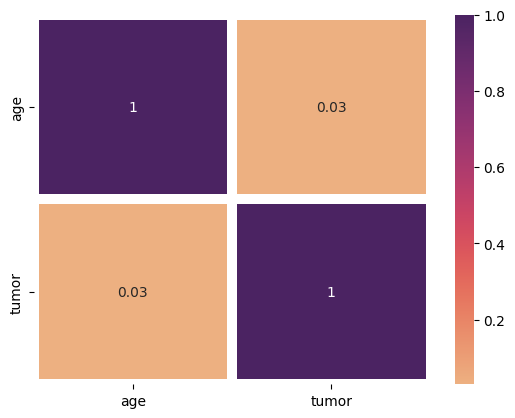

In [72]:

sb.heatmap(np.corrcoef(ages, Y), annot=True, cmap='flare', linewidths=6,\
           xticklabels=['age', 'tumor'], yticklabels=['age', 'tumor']);


In [73]:
y_pred = sv.predict(X_test)

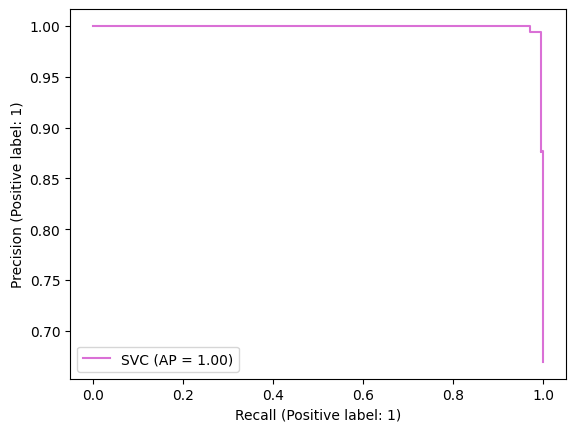

In [74]:
PrecisionRecallDisplay.from_estimator(sv, X_test, Y_test, color='orchid');

In [75]:
sv = svc(probability=True)

In [76]:
fpr, tpr, thr = roc_curve(Y_test, y_pred[:,1])

IndexError: ignored

In [ ]:
pt.plot(fpr, tpr, color='orchid')
pt.plot([0, 1], ls="--", color='lightgreen');

In [ ]:
pt.plot(fpr, tpr, color='orchid')
pt.plot([0, 1], ls="--", color='lightgreen');

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'linear', 'sigmoid']}
grid = GridSearchCV(svc(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, Y_train)